In [34]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
!pip install quandl
import quandl

In [23]:
aapl = quandl.get('WIKI/AAPL', start_date='2006-10-01', end_date='2012-01-01')
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,25.998841,26.303468,25.645240,25.988653,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.705166,12.772640,12.621165,12.702032,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.435493,9.507461,9.330112,9.411076,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.705046,15.970427,15.457014,15.681271,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.651867,23.068252,22.243192,22.597891,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,34.883823,35.203502,34.500852,34.814426,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.202038,54.836897,53.460513,54.263725,8.432424e+08


In [23]:
aapl.to_csv('aapl_ohlc.csv')
df = pd.read_csv('aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)
print(aapl['Close'][-10:])

Date
2011-12-16    381.020
2011-12-19    382.210
2011-12-20    395.950
2011-12-21    396.445
2011-12-22    398.550
2011-12-23    403.330
2011-12-27    406.530
2011-12-28    402.640
2011-12-29    405.120
2011-12-30    405.000
Name: Close, dtype: float64


In [0]:
aapl.head(3)

In [0]:
print(aapl.loc['2007'].tail(3))
print(aapl.iloc[[22,43],[0,3]])

In [0]:
sample = aapl.sample(20)
print(sample.head())
monthly_aapl = aapl.resample('M').mean()

print(monthly_aapl)

In [0]:
test = aapl.asfreq('M', method='bfill')
test.head(3)

In [0]:
monthly_aapl.head(3)

In [0]:
# daily returns
daily_close = aapl[['Adj. Close']]
print(daily_close[:3])
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change[:3])
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns[:3])

In [0]:
# resample for business months, take last obs
monthly = aapl.resample('BM').apply(lambda x: x[-1])
print(monthly[:3])
monthly.pct_change()
print(monthly[:3])
quarter = aapl.resample('4M').mean()
quarter.pct_change()

In [0]:
# can use shift() instead of pct_change , then divide by daily_close
daily_pct_change = daily_close / daily_close.shift(1) -1
daily_pct_log = np.log(daily_close / daily_close.shift(1))
print(daily_pct_log)

In [0]:
# plot distribution of dail pct change
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

In [0]:
# cumulative daily rate of return = value of inv at regular intervals. use daily_pct_change + 1 and cumprod
cum_daily_return = (1+daily_pct_change).cumprod()
print(cum_daily_return[-3:])

In [0]:
cum_daily_return.plot(figsize=(12,8))
plt.show()

In [0]:
# resample to monthly returns
cum_monthly_return = cum_daily_return.resample('M').mean()
print(cum_monthly_return)
cum_monthly_return.plot(figsize=(12,8))

In [7]:
# aggregate all data for aapl, msft, ibm, goog

tickers = ['AAPL','MSFT', 'IBM','GOOG']

def get_stockdata(tickers, startdate, enddate):
  def data(ticker):
    return(quandl.get(r'WIKI/'+ticker, start_date=startdate, end_date=enddate))
  datas = map(data, tickers)
  return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

all_data = get_stockdata(tickers, dt.datetime(2006,10,1), dt.datetime(2012,1,1))

LimitExceededError: ignored

In [0]:
# replace when QUANDL limit reached 
import pandas_datareader as pdr
tickers = ['AAPL','MSFT', 'IBM','GOOG']

def get_stockdata(tickers, startdate, enddate):
  def data(ticker):
    return(pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map(data, tickers)
  return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

all_data = get_stockdata(tickers, dt.datetime(2006,10,1), dt.datetime(2012,1,1))

In [9]:
all_data.index

MultiIndex(levels=[['AAPL', 'MSFT', 'IBM', 'GOOG'], [2006-10-02 00:00:00, 2006-10-03 00:00:00, 2006-10-04 00:00:00, 2006-10-05 00:00:00, 2006-10-06 00:00:00, 2006-10-09 00:00:00, 2006-10-10 00:00:00, 2006-10-11 00:00:00, 2006-10-12 00:00:00, 2006-10-13 00:00:00, 2006-10-16 00:00:00, 2006-10-17 00:00:00, 2006-10-18 00:00:00, 2006-10-19 00:00:00, 2006-10-20 00:00:00, 2006-10-23 00:00:00, 2006-10-24 00:00:00, 2006-10-25 00:00:00, 2006-10-26 00:00:00, 2006-10-27 00:00:00, 2006-10-30 00:00:00, 2006-10-31 00:00:00, 2006-11-01 00:00:00, 2006-11-02 00:00:00, 2006-11-03 00:00:00, 2006-11-06 00:00:00, 2006-11-07 00:00:00, 2006-11-08 00:00:00, 2006-11-09 00:00:00, 2006-11-10 00:00:00, 2006-11-13 00:00:00, 2006-11-14 00:00:00, 2006-11-15 00:00:00, 2006-11-16 00:00:00, 2006-11-17 00:00:00, 2006-11-20 00:00:00, 2006-11-21 00:00:00, 2006-11-22 00:00:00, 2006-11-24 00:00:00, 2006-11-27 00:00:00, 2006-11-28 00:00:00, 2006-11-29 00:00:00, 2006-11-30 00:00:00, 2006-12-01 00:00:00, 2006-12-04 00:00:00, 20

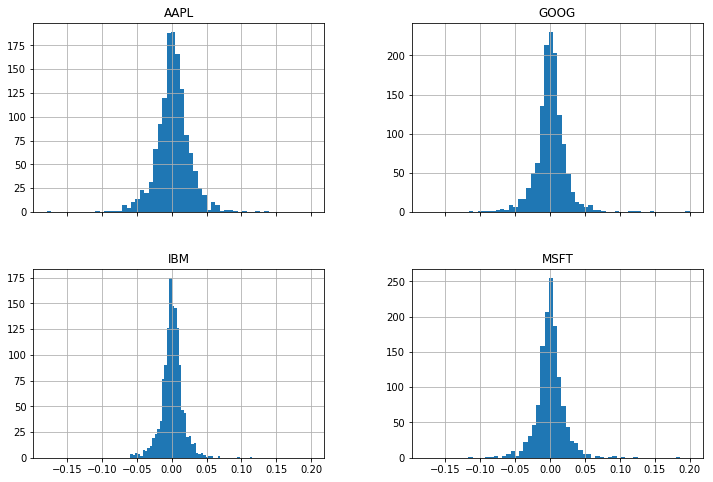

In [3]:
# example slicing::-->:   df.iloc[:df.index.get_loc('c') + 1, :4]

daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

In [13]:
print(all_data.index)

MultiIndex(levels=[['AAPL', 'MSFT', 'IBM', 'GOOG'], [2006-10-02 00:00:00, 2006-10-03 00:00:00, 2006-10-04 00:00:00, 2006-10-05 00:00:00, 2006-10-06 00:00:00, 2006-10-09 00:00:00, 2006-10-10 00:00:00, 2006-10-11 00:00:00, 2006-10-12 00:00:00, 2006-10-13 00:00:00, 2006-10-16 00:00:00, 2006-10-17 00:00:00, 2006-10-18 00:00:00, 2006-10-19 00:00:00, 2006-10-20 00:00:00, 2006-10-23 00:00:00, 2006-10-24 00:00:00, 2006-10-25 00:00:00, 2006-10-26 00:00:00, 2006-10-27 00:00:00, 2006-10-30 00:00:00, 2006-10-31 00:00:00, 2006-11-01 00:00:00, 2006-11-02 00:00:00, 2006-11-03 00:00:00, 2006-11-06 00:00:00, 2006-11-07 00:00:00, 2006-11-08 00:00:00, 2006-11-09 00:00:00, 2006-11-10 00:00:00, 2006-11-13 00:00:00, 2006-11-14 00:00:00, 2006-11-15 00:00:00, 2006-11-16 00:00:00, 2006-11-17 00:00:00, 2006-11-20 00:00:00, 2006-11-21 00:00:00, 2006-11-22 00:00:00, 2006-11-24 00:00:00, 2006-11-27 00:00:00, 2006-11-28 00:00:00, 2006-11-29 00:00:00, 2006-11-30 00:00:00, 2006-12-01 00:00:00, 2006-12-04 00:00:00, 20

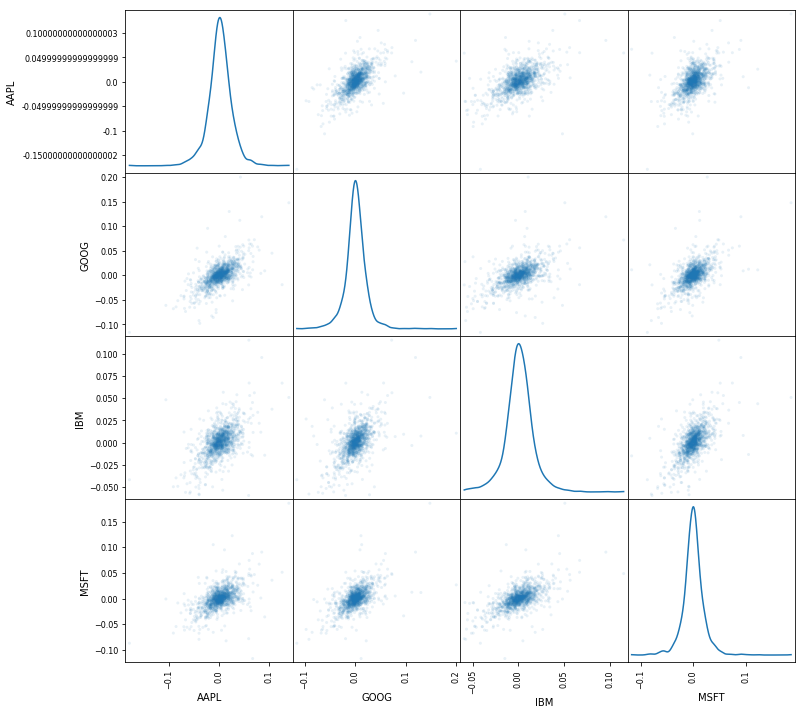

In [4]:
# scatter matrix plot
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))
plt.show()

In [8]:
# rolling windows
adj_close_px = aapl['Adj. Close'] # DEPENDING ON QUANDL vs panda_datareader add 'Adj.' vs 'Adj'
moving_avg = adj_close_px.rolling(window=40).mean()
#others
moving_max = adj_close_px.rolling(window=40).max()
moving_var = adj_close_px.rolling(window=40).var()
moving_std = adj_close_px.rolling(window=40).std()
moving_medi= adj_close_px.rolling(window=40).median()
print(moving_avg[-10:])
print(moving_max[-3:])
print(moving_var[-3:])
print(moving_std[-3:])
print(moving_medi[-3:])

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64
Date
2011-12-28    52.244771
2011-12-29    52.244771
2011-12-30    52.244771
Name: Adj. Close, dtype: float64
Date
2011-12-28    2.003295
2011-12-29    2.095500
2011-12-30    2.177987
Name: Adj. Close, dtype: float64
Date
2011-12-28    1.415378
2011-12-29    1.447584
2011-12-30    1.475800
Name: Adj. Close, dtype: float64
Date
2011-12-28    49.986781
2011-12-29    49.986781
2011-12-30    49.986781
Name: Adj. Close, dtype: float64


In [0]:
# short and long window
aapl['42'] = adj_close_px.rolling(window=40).mean()

aapl['252'] = adj_close_px.rolling(window=252).mean()

aapl[['Adj. Close', '42', '252']].plot()

plt.show()

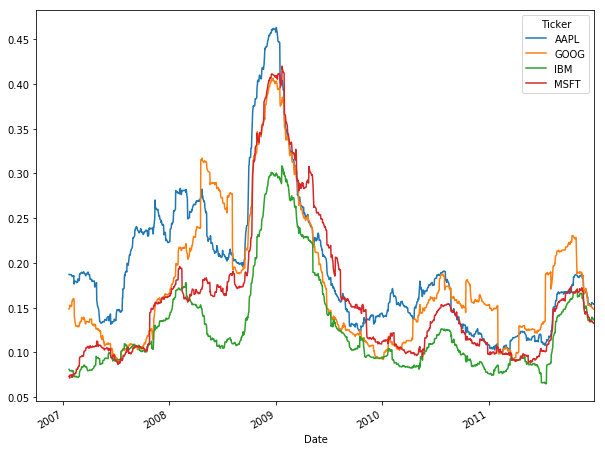

In [16]:
# volatility calculation- change in variance in returns of a stock over period of time
# moving historical volatility = moving historical std of log returns
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize=(10,8))
plt.show()



In [25]:
# OLS, ordinary least squares regression
import statsmodels.api as sm
#from pandas.tseries import 

all_adj_close = all_data[['Adj Close']]
print(all_adj_close[-3:])
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

#isolate all aapl returns
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# isolate MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# new DF with aapl and msft returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]

return_data.columns = ['AAPL','MSFT']
print(return_data[-3:])

# add constant
X = sm.add_constant(return_data['AAPL'])
#print('const: {}'.format(X))

model = sm.OLS(return_data['MSFT'], X).fit()

print(model.summary())

                    Adj Close
Ticker Date                  
GOOG   2011-12-28  318.655609
       2011-12-29  320.000549
       2011-12-30  321.744019
                AAPL      MSFT
Date                          
2011-12-28 -0.009615 -0.008485
2011-12-29  0.006141  0.007716
2011-12-30 -0.000296 -0.002309
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           1.33e-96
Time:                        15:52:04   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                          

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


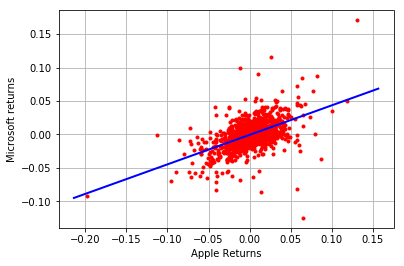

In [26]:
# plot OLS 
plt.plot(return_data['AAPL'], return_data['MSFT'],'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1]+0.01)

# plot regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')
plt.show()


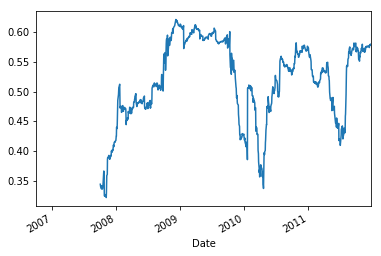

In [27]:
# use plotting correlation of returns to crosscheck results
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

In [28]:
# simple crossing moving average (short vs long) window trading
short_win = 40
long_win = 100
signals_df = pd.DataFrame(index=aapl.index)
print(signals_df)
signals_df['signal'] = 0.0
signals_df['short_mavg'] = aapl['Close'].rolling(window=short_win, min_periods=1, center=False).mean()
signals_df['long_mavg'] = aapl['Close'].rolling(window=long_win, min_periods=1, center=False).mean()
print(signals_df.head(2))
#create signals
signals_df['signal'][short_win:] = np.where(signals_df['short_mavg'][short_win:] > signals_df['long_mavg'][short_win:], 1.0, 0.0)
# generate trading orders
signals_df['positions'] = signals_df['signal'].diff()

print(signals_df)


Empty DataFrame
Columns: []
Index: [2006-10-02 00:00:00, 2006-10-03 00:00:00, 2006-10-04 00:00:00, 2006-10-05 00:00:00, 2006-10-06 00:00:00, 2006-10-09 00:00:00, 2006-10-10 00:00:00, 2006-10-11 00:00:00, 2006-10-12 00:00:00, 2006-10-13 00:00:00, 2006-10-16 00:00:00, 2006-10-17 00:00:00, 2006-10-18 00:00:00, 2006-10-19 00:00:00, 2006-10-20 00:00:00, 2006-10-23 00:00:00, 2006-10-24 00:00:00, 2006-10-25 00:00:00, 2006-10-26 00:00:00, 2006-10-27 00:00:00, 2006-10-30 00:00:00, 2006-10-31 00:00:00, 2006-11-01 00:00:00, 2006-11-02 00:00:00, 2006-11-03 00:00:00, 2006-11-06 00:00:00, 2006-11-07 00:00:00, 2006-11-08 00:00:00, 2006-11-09 00:00:00, 2006-11-10 00:00:00, 2006-11-13 00:00:00, 2006-11-14 00:00:00, 2006-11-15 00:00:00, 2006-11-16 00:00:00, 2006-11-17 00:00:00, 2006-11-20 00:00:00, 2006-11-21 00:00:00, 2006-11-22 00:00:00, 2006-11-24 00:00:00, 2006-11-27 00:00:00, 2006-11-28 00:00:00, 2006-11-29 00:00:00, 2006-11-30 00:00:00, 2006-12-01 00:00:00, 2006-12-04 00:00:00, 2006-12-05 00:00:00

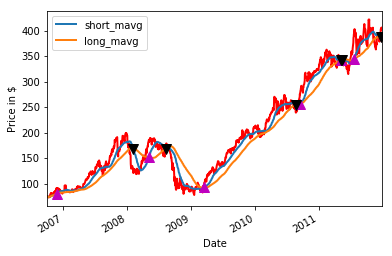

In [29]:
# plot trading strategy results
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price in $')
aapl['Close'].plot(ax=ax1, color='r', lw=2.)
# plot short/long mvg avg
signals_df[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
# buy signals
ax1.plot(signals_df.loc[signals_df.positions == 1.0].index, signals_df.short_mavg[signals_df.positions == 1.0], "^", markersize=10, color='m')
# sell signals
ax1.plot(signals_df.loc[signals_df.positions == -1.0].index, signals_df.short_mavg[signals_df.positions == -1.0], "v",markersize=10, color='k')
plt.show()



In [32]:
# backtesting trading strategy & calc performance
# pitfalls: external events, market regime shifts, regulatory changes and macroeconomic events
# backtesting components: data handler (interface to data), strategy (gen signal to long/shnort), portfolio (gen orders & manage pnL), execution handler
initial_capital = float(100000.0)
positions = pd.DataFrame(index=signals_df.index).fillna(0.0)
positions['AAPL'] = 100*signals_df['signal']
print(positions['AAPL'][-3:])

#new df to store market value of open positions
portfolio = positions.multiply(aapl['Adj. Close'],axis=0)
pos_diff = positions.diff()
#backtesting
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)
print(portfolio.tail(2))
# add cash col
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
print(portfolio.tail(2))
# add returns
portfolio['returns'] = portfolio['total'].pct_change()
print(portfolio.head())

Date
2011-12-28    0.0
2011-12-29    0.0
2011-12-30    0.0
Name: AAPL, dtype: float64
            AAPL  holdings
Date                      
2011-12-29   0.0       0.0
2011-12-30   0.0       0.0
            AAPL  holdings           cash          total
Date                                                    
2011-12-29   0.0       0.0  102920.093691  102920.093691
2011-12-30   0.0       0.0  102920.093691  102920.093691
            AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0  100000.0  100000.0      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      0.0
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


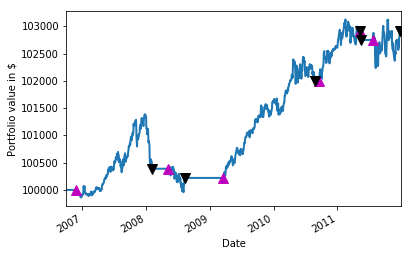

In [33]:
# plot backtesting
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel="Portfolio value in $")
# plot equity curve
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals_df.positions == 1.0].index, portfolio.total[signals_df.positions == 1.0],'^',markersize=10, color='m')
ax1.plot(portfolio.loc[signals_df.positions == -1.0].index, portfolio.total[signals_df.positions == -1.0], 'v', markersize=10, color='k')
plt.show()

In [36]:
# now can use other backtesting platform like QUantopian - open source hosted platform for building and executing trading strategies
print(aapl.head(3))

             Open    High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                              ...                                   
2006-10-02  75.10  75.870  74.30  ...  9.548586    9.620553  178159800.0
2006-10-03  74.45  74.950  73.19  ...  9.405935    9.519027  197677200.0
2006-10-04  74.10  75.462  73.16  ...  9.402080    9.687381  207270700.0

[3 rows x 12 columns]


In [37]:
# calculate some metrics like sharpe ratio (ratio between returns and additional risk)
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

print(sharpe_ratio)

0.7261238825870256


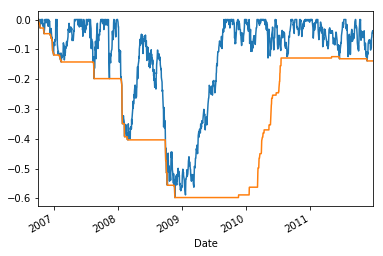

In [38]:
# max drawdown measure largest dsingle drop from peak to bottom in value of portfolio
window = 252

# calculate max drawdown in past window days for each day
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close'] / rolling_max - 1.0

# calc min (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# plot results
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

In [39]:
# compound annual growth rate = constant rate of return over time period = (end value/ start value ^(1/n) - 1)
days = (aapl.index[-1] - aapl.index[0]).days

# CAGR
cagr = ((((aapl['Adj. Close'][-1]) / aapl['Adj. Close'])) ** (356.0/days)) - 1
print(cagr)


Date
2006-10-02    0.368685
2006-10-03    0.371387
2006-10-04    0.366925
2006-10-05    0.368787
2006-10-06    0.370871
2006-10-09    0.369468
2006-10-10    0.372284
2006-10-11    0.374298
2006-10-12    0.367329
2006-10-13    0.368142
2006-10-16    0.366857
2006-10-17    0.370631
2006-10-18    0.369809
2006-10-19    0.355089
2006-10-20    0.352049
2006-10-23    0.347354
2006-10-24    0.348619
2006-10-25    0.346679
2006-10-26    0.345122
2006-10-27    0.350608
2006-10-30    0.350577
2006-10-31    0.348526
2006-11-01    0.354547
2006-11-02    0.355121
2006-11-03    0.357333
2006-11-06    0.352805
2006-11-07    0.350296
2006-11-08    0.344332
2006-11-09    0.341652
2006-11-10    0.342311
                ...   
2011-11-17    0.013203
2011-11-18    0.014440
2011-11-21    0.017451
2011-11-22    0.013652
2011-11-23    0.018490
2011-11-25    0.020264
2011-11-28    0.013848
2011-11-29    0.015318
2011-11-30    0.010830
2011-12-01    0.008037
2011-12-02    0.007185
2011-12-05    0.005602
2011-1